In [15]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np


In [16]:
# Load the image
image_path = 'C:/Users/DELL/Downloads/19232ed8e7cd74d6187423ef6325d3fa.jpg'   # Replace with your image filename
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [17]:
# Step 1: Add padding (50 pixels on each side)
padded = cv2.copyMakeBorder(image, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=(255, 255, 255))

# Step 2: Resize (zoom with padding)
resized = cv2.resize(padded, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

# Step 3: Grayscale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# Step 4: Denoise
gray = cv2.fastNlMeansDenoising(gray, h=30)

# Step 5: Adaptive Thresholding
thresh = cv2.adaptiveThreshold(gray, 255,
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 11, 2)

# Step 6: Morphological Opening
kernel = np.ones((2, 2), np.uint8)
processed = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

In [18]:
reader = easyocr.Reader(['en'])
results = reader.readtext(processed)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


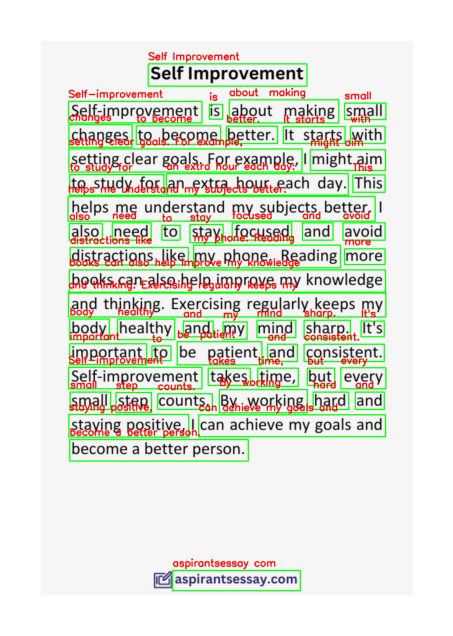

In [14]:
# Draw results
for (bbox, text, prob) in results:
    (tl, tr, br, bl) = bbox
    tl = tuple(map(int, tl))
    br = tuple(map(int, br))
    cv2.rectangle(resized, tl, br, (0, 255, 0), 2)
    cv2.putText(resized, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# Show final image
plt.figure(figsize=(12, 8))
plt.imshow(resized)
plt.axis('off')
plt.show()